# Stereo Vision Depth Estimation

## Objective
Calculate the depth (distance) of an object in the frame using stereo camera images.

In this exercise, you'll estimate the **distance to an object** using pseudo-stereo vision - simulating a stereo camera using two photos taken from slightly different positions, in this case by a single iPhone camera.

## What You'll Need
- Two images from a stereo camera (left and right)
- Known distance between camera lenses (baseline)
- Known object dimensions (for reference)
- Camera focal length

## The Concept

Stereo vision works like your eyes - by comparing two slightly different views of the same scene, we can determine depth.

### Key Formula:

$$
\text{Depth} = \frac{\text{Baseline} \times \text{Focal Length}}{\text{Disparity}}
$$

Where:
- **Baseline (B)**: Distance between the two camera lenses (cm)
- **Focal Length (f)**: Camera focal length (pixels)
- **Disparity (d)**: Difference in pixel position of the same point in left vs right image (pixels)
- **Depth (Z)**: Distance from camera to object (cm)

---

## Setup

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# For displaying images
def show_images(img1, img2, title1="Left Camera", title2="Right Camera"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) if len(img1.shape) == 3 else img1, cmap='gray')
    ax1.set_title(title1)
    ax1.axis('off')
    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) if len(img2.shape) == 3 else img2, cmap='gray')
    ax2.set_title(title2)
    ax2.axis('off')
    plt.tight_layout()
    plt.show()

print("✓ Setup complete!")

✓ Setup complete!


## Given Information


In [6]:
# Camera setup parameters (TO BE PROVIDED)
BASELINE = 6.0  # Distance between camera lenses in cm
FOCAL_LENGTH = 0.0 # Focal length in pixels, calculated above

OBJECT_REAL_WIDTH = 13.0  # Real width of object in cm
OBJECT_REAL_HEIGHT = 20.0  # Real height of object in cm

print(f"Baseline: {BASELINE} cm")
print(f"Focal Length: {FOCAL_LENGTH} pixels")
print(f"Object Width: {OBJECT_REAL_WIDTH} cm")
print(f"Object Height: {OBJECT_REAL_HEIGHT} cm")

Baseline: 6.0 cm
Focal Length: 0.0 pixels
Object Width: 13.0 cm
Object Height: 20.0 cm


## Load Stereo Images

Load the left and right camera images from the Dataset folder.

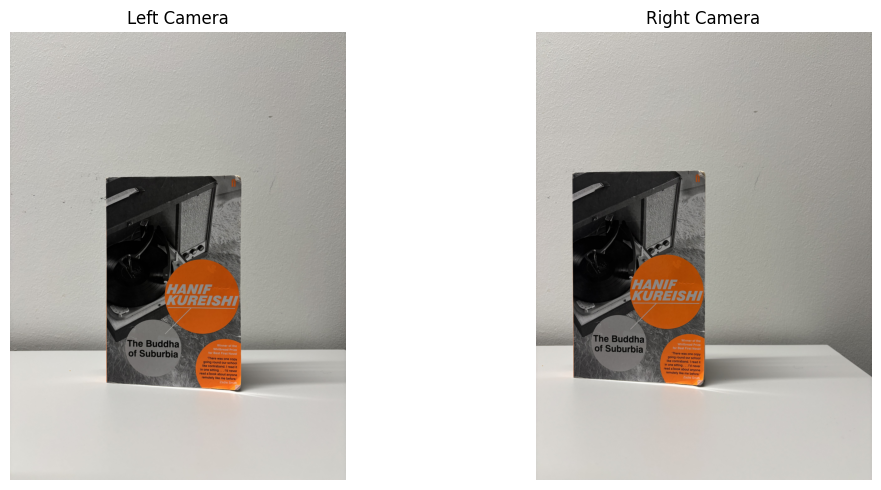

Image size: (5712, 4284)


In [4]:
# Load images (update paths as needed)
left_image = cv2.imread('Images/left_book.jpg')
right_image = cv2.imread('Images/right_book.jpg')

# Convert to grayscale for processing
left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# Display the stereo pair
show_images(left_image, right_image)

print(f"Image size: {left_gray.shape}")

---
## Task 1: Camera Calibration - Calculate Focal Length

Before we can estimate depth, we need to know our camera's **focal length** in pixels. Given the images were taken with an IPhone we are implementing a psuedo-stereo camera.

We'll use checkerboard calibration images to calculate this.

### The Process:
1. **Load calibration images** - Multiple photos of a checkerboard pattern from different angles, from the Images/
2. **Detect corners** - Find the inner corners of the checkerboard automatically
3. **Calibrate** - Use the detected corners and known square size to calculate camera parameters
4. **Extract focal length** - Get the focal length value to use in depth estimation

### Your Task:
Complete the code below to perform camera calibration.

**Hints:**
- Use `glob.glob()` to find all images matching a pattern
- `cv2.findChessboardCornersSB()` detects checkerboard corners on a screen
- `cv2.calibrateCamera()` returns the camera matrix (contains focal length)
- Focal length is stored in `camera_matrix[0, 0]` (fx) and `camera_matrix[1, 1]` (fy)


In [ ]:
## TODO: Calibrate the camera using checkerboard images

import cv2
import numpy as np
import glob

# ===== USER INPUT =====
CHECKERBOARD = (9, 6)      # inner corners, do not change
SQUARE_SIZE = 2.5          # cm measured square size, do not change
IMAGE_PATH = "Images/Checkerboard/*.jpg"
# ======================

## Your code below here
## If you get stuck example.txt contains sample code

print("Camera matrix:\n", camera_matrix)
print("Distortion coeffs:\n", dist_coeffs)

fx = camera_matrix[0, 0]
fy = camera_matrix[1, 1]
cx = camera_matrix[0, 2]
cy = camera_matrix[1, 2]

print(f"fx={fx:.1f}, fy={fy:.1f}, cx={cx:.1f}, cy={cy:.1f}")


Processing: Images/Checkerboard/IMG_4749.jpg
Processing: Images/Checkerboard/IMG_4748.jpg
Processing: Images/Checkerboard/IMG_4754.jpg
Processing: Images/Checkerboard/IMG_4741.jpg
Processing: Images/Checkerboard/IMG_4755.jpg
Processing: Images/Checkerboard/IMG_4743.jpg
Processing: Images/Checkerboard/IMG_4742.jpg
Processing: Images/Checkerboard/IMG_4752.jpg
Processing: Images/Checkerboard/IMG_4753.jpg
Processing: Images/Checkerboard/IMG_4747.jpg
Processing: Images/Checkerboard/IMG_4751.jpg
Processing: Images/Checkerboard/IMG_4745.jpg
Processing: Images/Checkerboard/IMG_4744.jpg
Processing: Images/Checkerboard/IMG_4750.jpg
Processing: Images/Checkerboard/IMG_4724.jpg
Camera matrix:
 [[4.43916885e+03 0.00000000e+00 2.14415454e+03]
 [0.00000000e+00 4.43867388e+03 2.85312508e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coeffs:
 [[ 2.88829927e-01 -1.85731708e+00 -8.70417653e-04 -5.28261999e-04
   3.49679774e+00]]
fx=4439.2, fy=4438.7, cx=2144.2, cy=2853.1


---
## Task 2: Manual Disparity Measurement

### Instructions:
1. Identify the same feature point in both images (e.g., corner of the object)
2. Note the pixel coordinates (x, y) in the left image
3. Note the pixel coordinates (x, y) in the right image
4. Calculate disparity: `disparity = x_left - x_right`

### Your Measurements:

In [5]:
# TODO: Measure pixel coordinates of the same point in both images
# You can use image viewing software or matplotlib's interactive features

# Example measurements (REPLACE WITH YOUR ACTUAL MEASUREMENTS):
x_left = 350   # x-coordinate in left image
x_right = 300  # x-coordinate in right image

# Calculate disparity
disparity = x_left - x_right

print(f"Left image x-coordinate: {x_left} px")
print(f"Right image x-coordinate: {x_right} px")
print(f"Disparity: {disparity} px")

Left image x-coordinate: 350 px
Right image x-coordinate: 300 px
Disparity: 50 px


## Task 3: Calculate Depth

Now use the depth formula to calculate the distance to the object.

In [ ]:
# TODO: Implement the depth calculation formula
# Depth = (Baseline × Focal Length) / Disparity

def calculate_depth(baseline, focal_length, disparity):
    """
    Calculate depth using stereo triangulation.
    
    Args:
        baseline: Distance between cameras (cm)
        focal_length: Camera focal length (pixels)
        disparity: Pixel difference between images (pixels)
    
    Returns:
        depth: Distance to object (cm)
    """
    # YOUR CODE HERE
    depth = 0
    return depth

# Calculate depth
estimated_depth = calculate_depth(BASELINE, FOCAL_LENGTH, disparity)

print(f"\n{'='*50}")
print(f"ESTIMATED DEPTH: {estimated_depth:.2f} cm")
print(f"{'='*50}")

## Task 4: Verification Using Object Size

We can verify our depth calculation using the known object size.

### Formula:
$$
\text{Depth} = \frac{\text{Real Width} \times \text{Focal Length}}{\text{Pixel Width}}
$$

In [ ]:
# TODO: Measure the object's width in pixels in one of the images
object_pixel_width = 100  # REPLACE with your measurement

# Calculate depth using object size
def calculate_depth_from_size(real_width, focal_length, pixel_width):
    """
    Calculate depth using known object size.
    
    Args:
        real_width: Actual width of object (cm)
        focal_length: Camera focal length (pixels)
        pixel_width: Object width in image (pixels)
    
    Returns:
        depth: Distance to object (cm)
    """
    # YOUR CODE HERE
    depth = 0  # Replace this
    return depth

depth_from_size = calculate_depth_from_size(OBJECT_REAL_WIDTH, FOCAL_LENGTH, object_pixel_width)

print(f"\nVerification:")
print(f"Depth from disparity: {estimated_depth:.2f} cm")
print(f"Depth from object size: {depth_from_size:.2f} cm")
print(f"Difference: {abs(estimated_depth - depth_from_size):.2f} cm")

## Task 5: Error Analysis

What factors might affect the accuracy of your depth estimation?

### Discussion Questions:

1. **Measurement Precision**: How accurate was your manual pixel measurement?

2. **Disparity and Distance**: What happens to disparity as objects get further away? How does this affect accuracy?

3. **Baseline Trade-off**: How would a larger baseline (more space between cameras) affect:
   - Depth accuracy?
   - Maximum measurable distance?
   - Minimum measurable distance?

4. **Real-World Challenges**: What problems might occur in real underwater ROV applications?

---
## Bonus Challenge: Automatic Disparity Calculation

Instead of manually measuring, can you use feature detection to automatically find matching points?

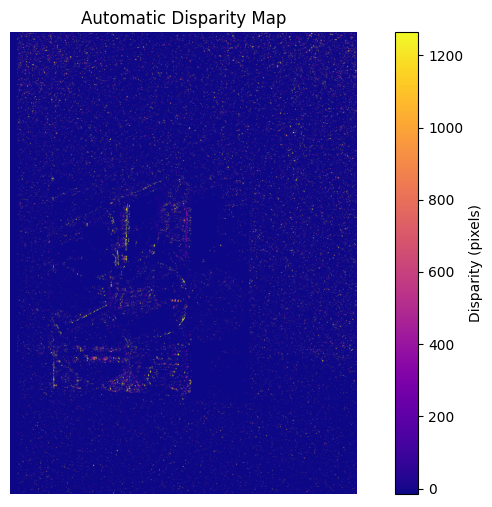

In [7]:
# OPTIONAL: Use OpenCV's stereo matching algorithms
# Hint: Look up cv2.StereoBM_create() or cv2.StereoSGBM_create()

# Example starter code:
stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)
disparity_map = stereo.compute(left_gray, right_gray)

# Visualize disparity map
plt.figure(figsize=(10, 6))
plt.imshow(disparity_map, cmap='plasma')
plt.colorbar(label='Disparity (pixels)')
plt.title('Automatic Disparity Map')
plt.axis('off')
plt.show()